# Predicting Airline Passenger Satisfaction Using Machine Learning

This project aims to develop a machine learning model that predicts airline passenger satisfaction ("Satisfied" or "Neutral/Unhappy") based on various service and demographic features. This predictive model helps airlines identify pain points in service and proactively improve customer experience.


In [70]:
# Step 1 Import libraries

In [1]:
# Import Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings("ignore")


##  Step 2 Load the dataset

In [2]:
 # Load the Data
df = pd.read_csv("Airline_Data.csv")

In [3]:
df.head()


,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [4]:
#Shape of dataframe
df.shape
print(f'df data has {df.shape[0]} rows and {df.shape[1]} columns.')

df data has 129880 rows and 24 columns.


In [5]:
#provides a concise summary of the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  object 
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

### 
In the above data we can see that Flight distance is a numerical measurement, and it should typically be represented by a numerical data type like int64 or float64.
 The fact that it's an object suggests that the column might contain:
 * Non-numeric characters: There could be letters, symbols, or spaces mixed in with the numbers.
 * Inconsistent formatting: Different ways of representing numbers (e.g., using commas as decimal separators in some entries).
 * A mix of data types: Though less common for a seemingly numerical column.
Therefore, Flight Distance is definitely a column that is not in the correct dtype. We would need to investigate the values in this column to clean and convert it to a numerical type for any meaningful analysis.

In [6]:
#Finding the unique values in the given columns
for i in df.columns:
    print("*********************************",i,"************************************")
    print()
    print(set(df[i].tolist()))

********************************* ID ************************************

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 20

In [7]:
df['Flight Distance'] = df['Flight Distance'].apply(lambda x :'3655' if x=='3655$' else x)
df['Flight Distance'] = df['Flight Distance'].apply(lambda x :'227' if x=='22%7' else x)
df['Flight Distance'] = df['Flight Distance'].apply(lambda x :'227' if x=='2$27' else x)

In [8]:
df['Flight Distance'] = df['Flight Distance'].astype('int64')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [10]:
#provides a statistical summary of numerical data
df.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


###  Observations
1.Delays: Median values are 0 for both departure and arrival delays, indicating most flights are punctual. But high standard deviation and max values suggest some extreme outliers.

2.Flight Distance: Huge variability, which could influence passenger satisfaction based on flight length.

3.Service Features: Most of them cluster around 3–4, so improving these to 4–5 could significantly boost satisfaction.

In [11]:
#provides a statistical summary of caregorical data
df.describe(include='object')


,Gender,Customer Type,Type of Travel,Class,Satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Returning,Business,Business,Neutral or Dissatisfied
freq,65899,106100,89693,62160,73452


### Observation:

1.Columns like [Flight Distance, Departure Delay, and Arrival Delay contain extreme values], indicating significant variability in these metrics.

2.The dataset shows a higher percentage of [Female passengers, Loyal Customers, Business travelers, Business class passengers, and Dissatisfied customers].

# Step 3. Data Cleaning and Preprocessing

####  Drop unnecessary columnn

In [12]:
# Drop the unnecessary column id' from the DataFrame
# id' is typically a unique identifier not useful for analysis
df.drop(['ID'], axis=1, inplace=True)
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied


### Handle missing values


In [13]:
# This displays the total count of missing (NaN) values per column
df.isnull().sum()


Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                  

### Most of the columns have no missing value but the arrival delay column has 393 missing values.

Text(0.5, 1.0, 'Histogram of Arrival Delay')

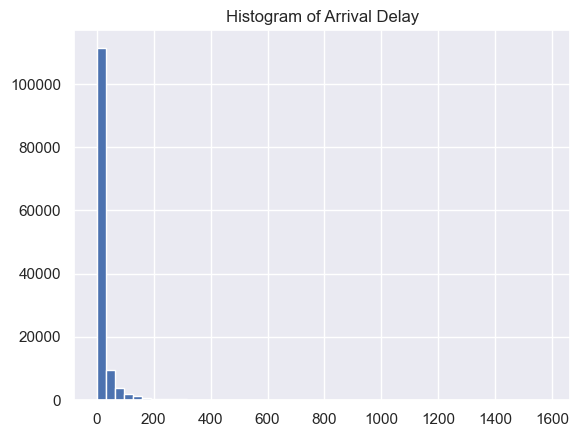

In [14]:
#analysising the values distribution for filling the values
df['Arrival Delay'].hist(bins=50)
plt.title('Histogram of Arrival Delay')

### WE can clearly see that the data is skewed here, which indicates the outliers so we use median here to fill null values

In [15]:
df['Arrival Delay'] = df['Arrival Delay'].fillna(df['Arrival Delay'].median())

In [16]:
#checking dupliate
df.duplicated().sum()


0

### There is no duplicate values in the dataset

### Checking & Hanling Outlier

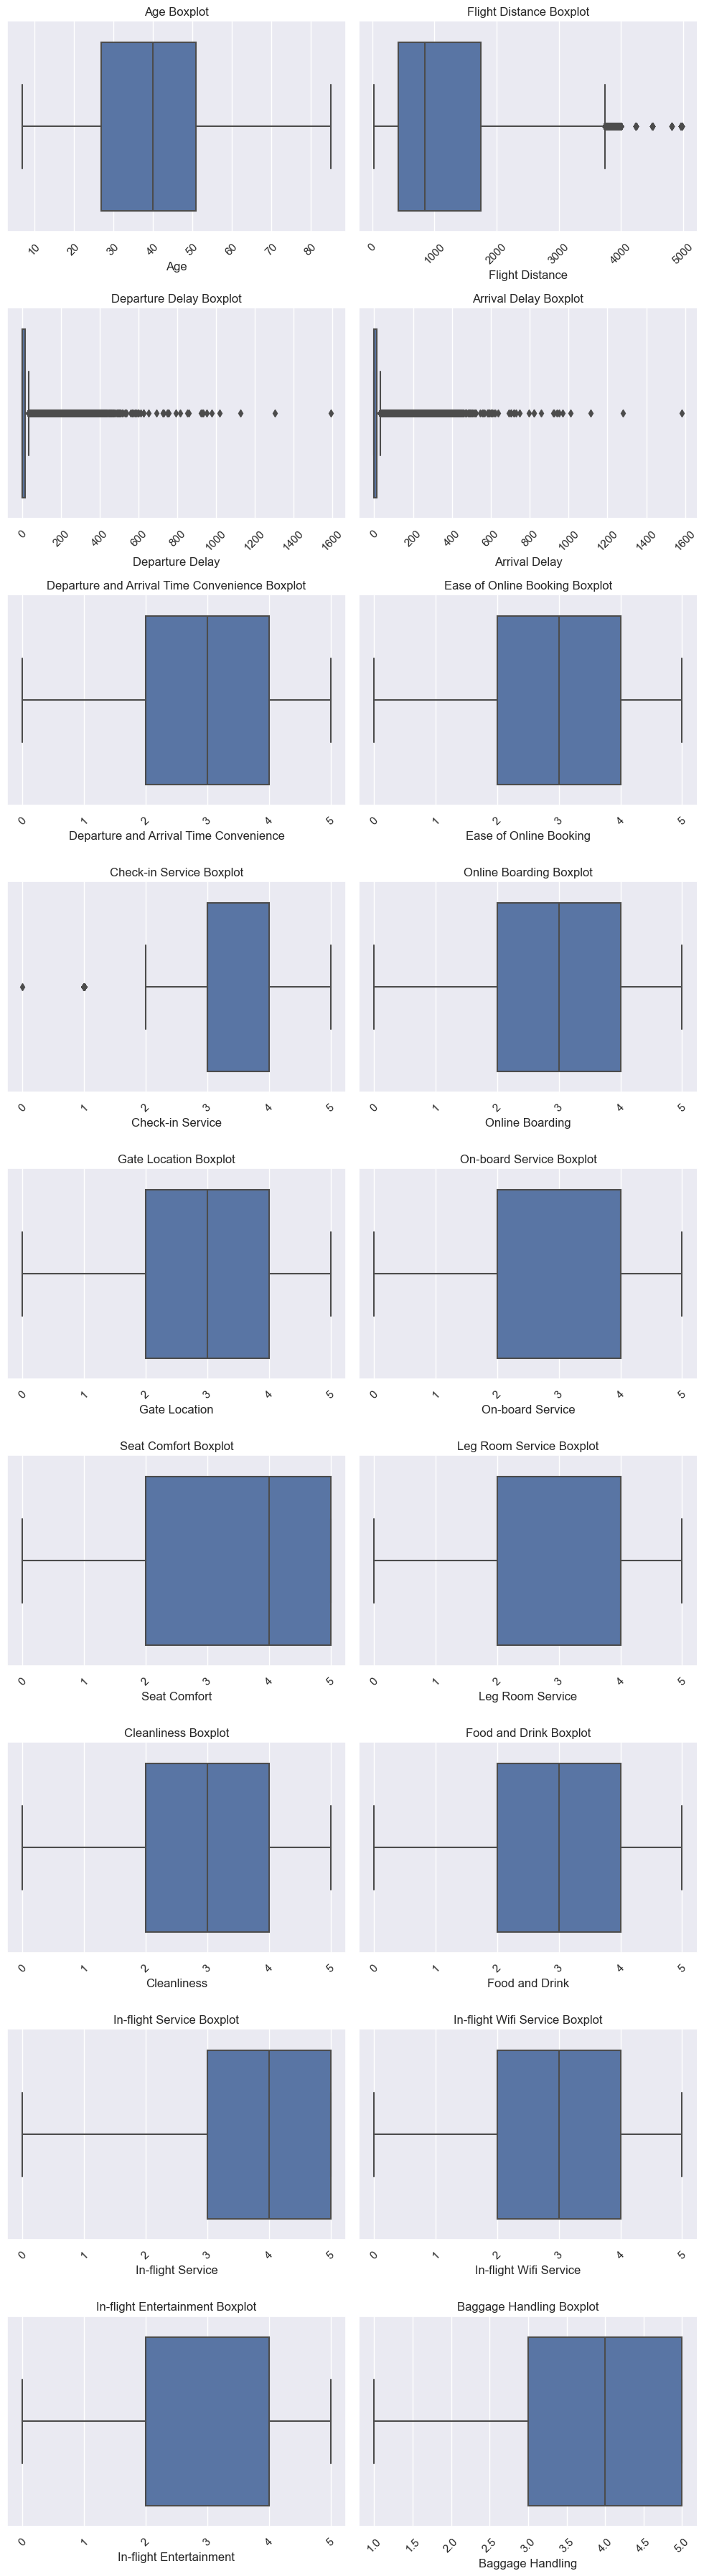

In [17]:
numerical = df.select_dtypes(include=['int', 'float']).copy()
# Calculate the number of numerical columns
num_cols = len(numerical.columns)
# Calculate the number of rows needed for subplots
num_rows = (num_cols + 1) // 2  # Ensure enough rows for all columns

# Reduced figure size
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(10, 4 * num_rows), dpi=100)  # Adjust figsize
axes = axes.flatten()

for idx, col in enumerate(numerical.columns):
    sns.boxplot(x=numerical[col], ax=axes[idx])
    axes[idx].set_xlabel(col)
    axes[idx].set_title(f'{col} Boxplot')
    axes[idx].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for i in range(num_cols, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()


### Outliers are detected in the given coloumns:

1.Arrival Delay Column.

2.Flight Distance Column.

3.Departure Delay Column.

## Handling Outliers


In [18]:
def handle_outliers(df, columns):
    for column in columns:
       # Calculate the first quartile (Q1) and third quartile (Q3) for the column
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
      # Calculate the Interquartile Range (IQR)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
       # Clip values outside the lower and upper bounds to limit extreme values
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return df

columns_to_handle= ['Flight Distance','Departure Delay','Arrival Delay']
df = handle_outliers(df, columns_to_handle)


# Step 4:Exploratory Data Analysis (EDA)

### Exploring the Satisfaction Column

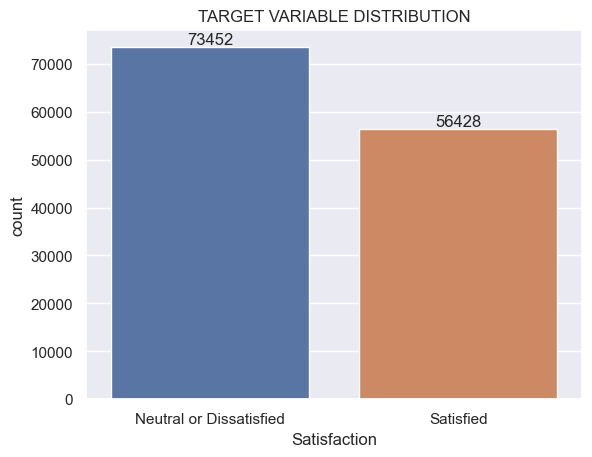

In [19]:
# ploting the target variable
ax = sns.countplot(x = df['Satisfaction'])
plt.bar_label(ax.containers[0])
plt.title('TARGET VARIABLE DISTRIBUTION')
plt.show()

### The neutral or Dissatisfied category has a considerably higher count than the satisfied category

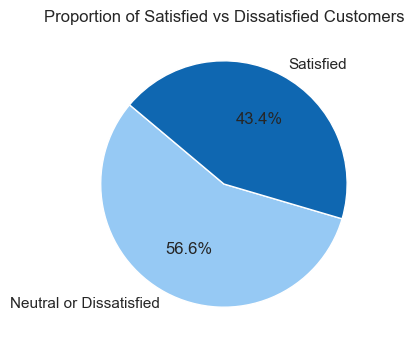

Neutral or Dissatisfied    73452
Satisfied                  56428
Name: Satisfaction, dtype: int64

In [20]:
satisfaction_counts = df['Satisfaction'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 4))
plt.pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.1f%%', startangle=140, colors=['#96C9F4', '#0F67B1'])
plt.title("Proportion of Satisfied vs Dissatisfied Customers")
plt.show()

print()
satisfaction_counts

In [21]:
# Creating the list of categorical and numerical columns
cat_cols = [cols for cols in df.columns if df[cols].dtype == 'O']
num_cols = [cols for cols in df.columns if cols not in cat_cols]

### Insights about the satisfaction levels across different features in the dataset.

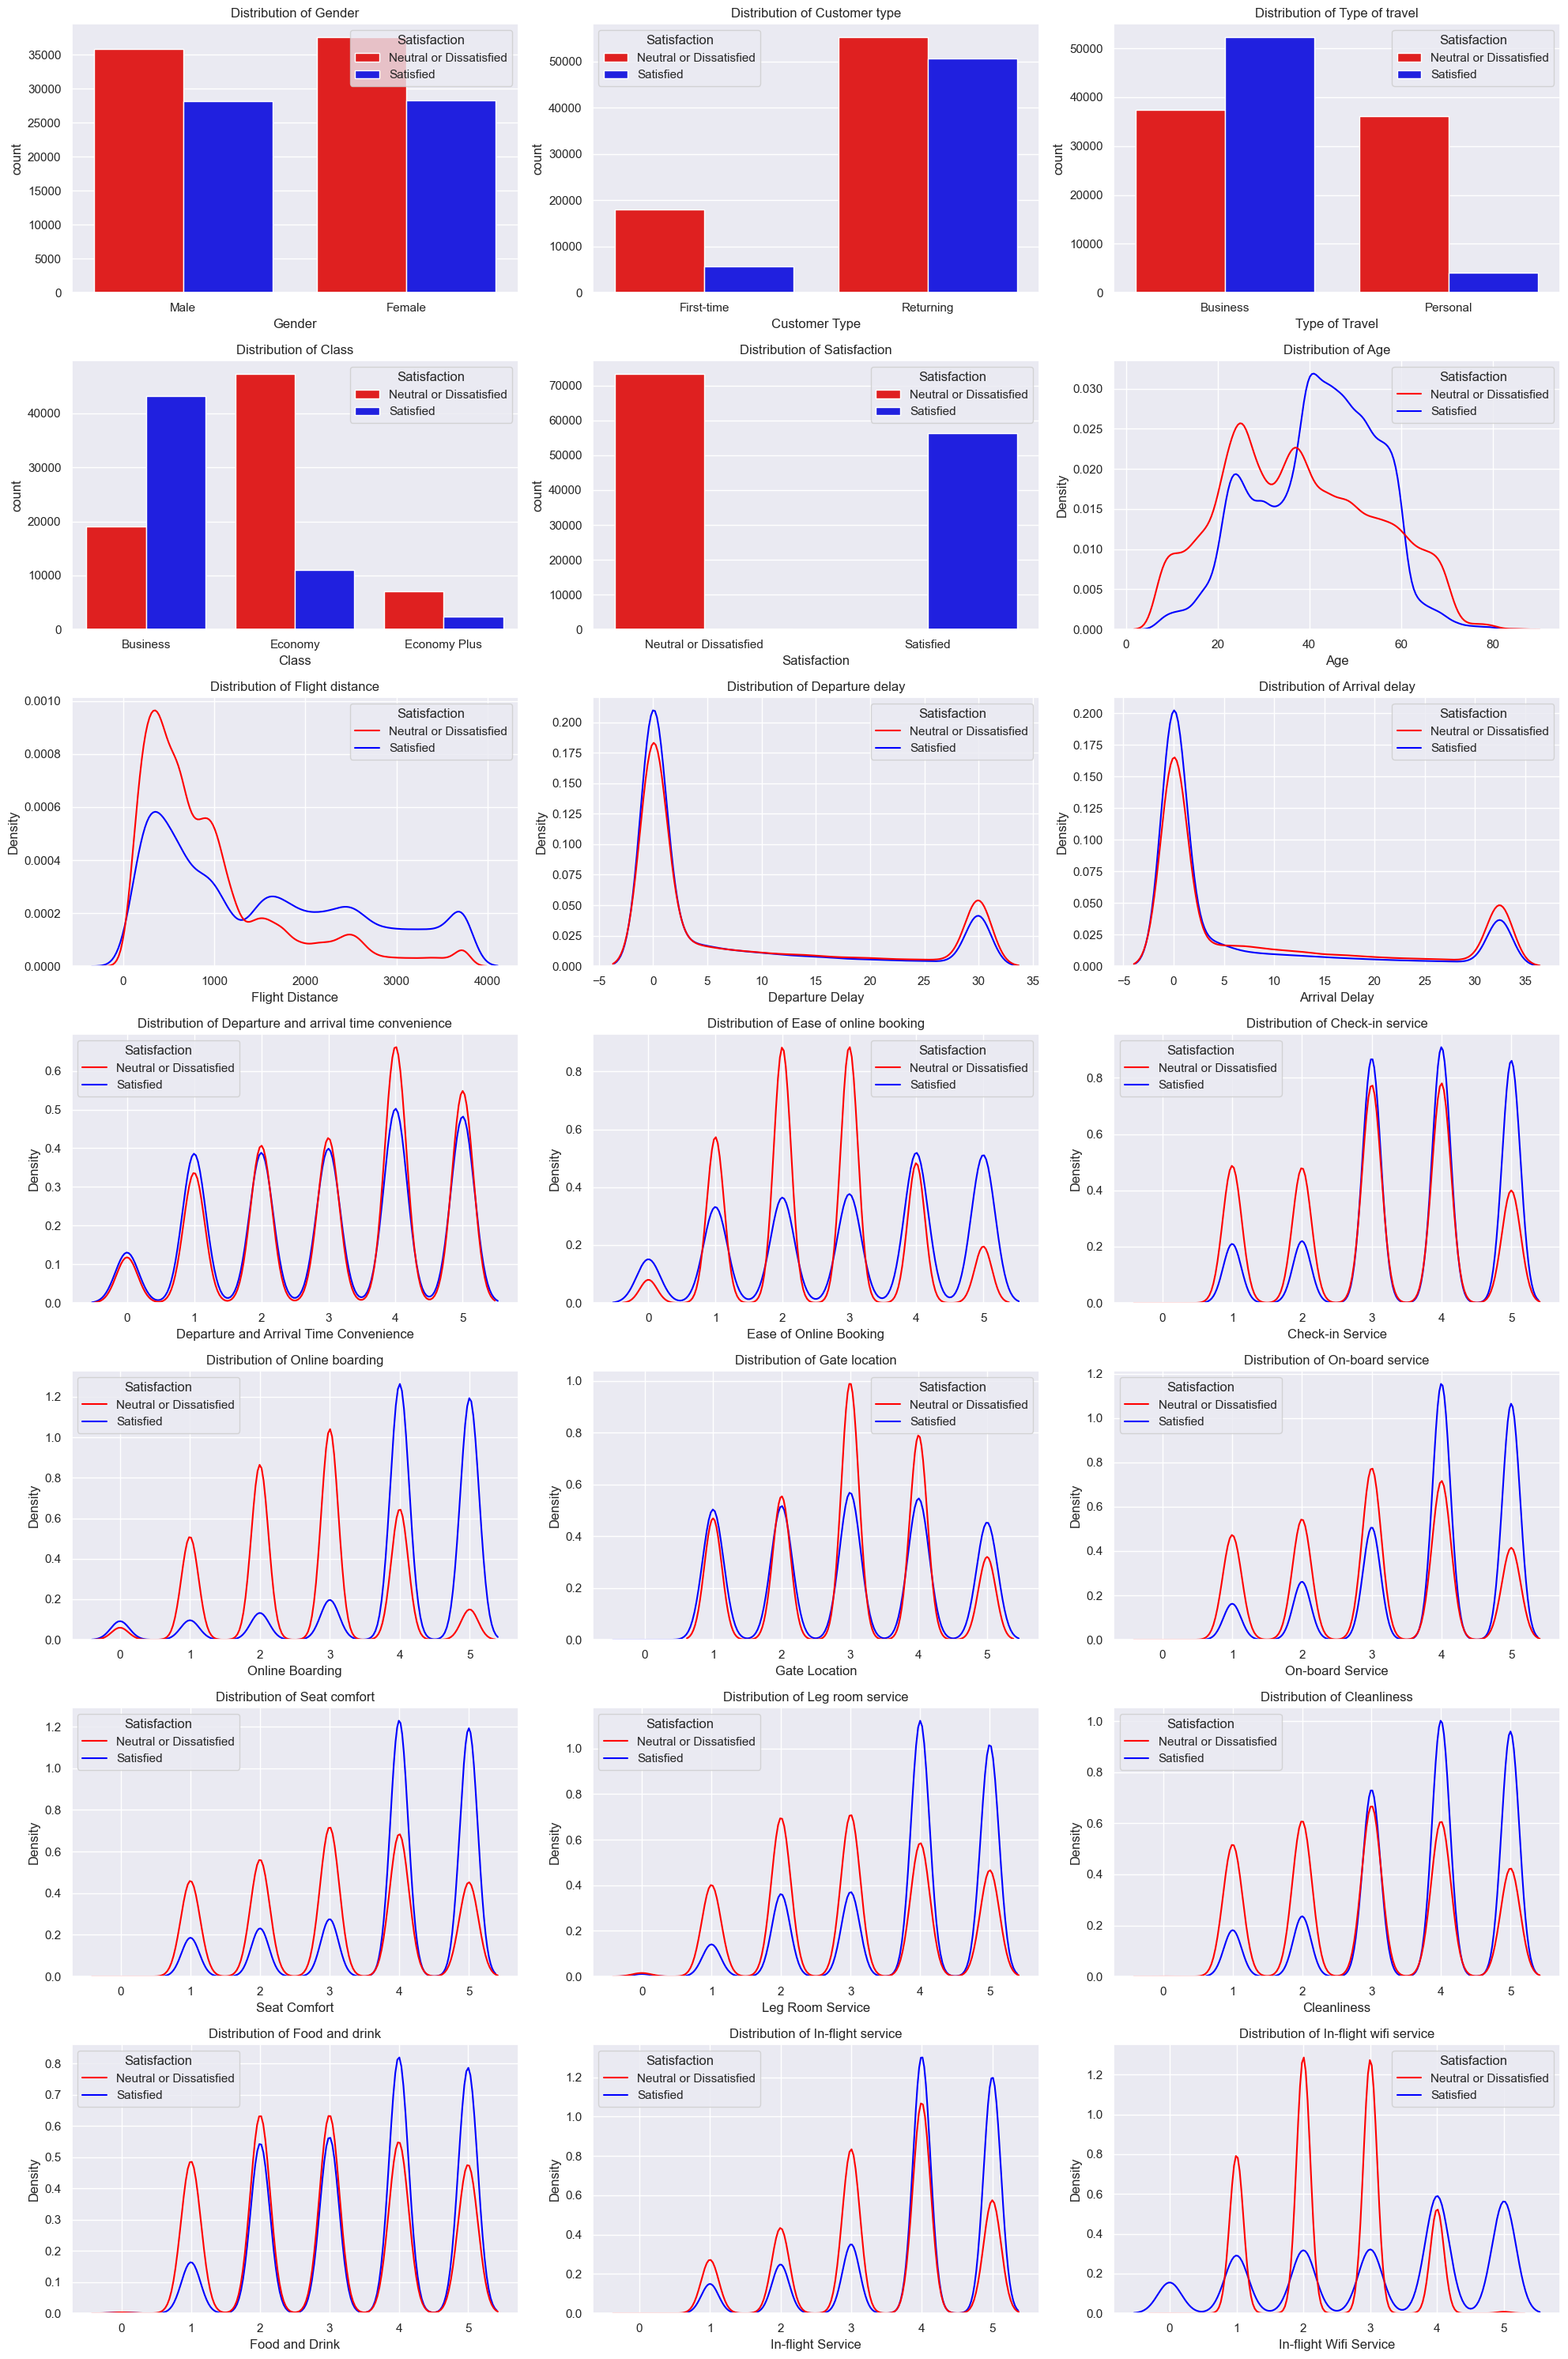

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate Categorical and Numerical Columns
cat = [col for col in df.columns if df[col].dtypes == "object"]
num = [col for col in df.columns if df[col].dtypes != "object"]

# Set up the figure and grid layout
total_plots = len(cat) + len(num)
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(20, 30))
axes = axes.flatten()

# Plot categorical features using count plots
for i, feature in enumerate(cat):
    if i >= len(axes):  # Check if we've used all axes
        break
    sns.countplot(data=df, x=feature, hue='Satisfaction', palette=['red', 'blue'], ax=axes[i])
    axes[i].set_title(f"Distribution of {feature.capitalize()}")

# Plot continuous features using KDE plots
for i, feature in enumerate(num, start=len(cat)):
    if i >= len(axes):  # Check if we've used all axes
        break
    sns.kdeplot(data=df, x=feature, hue='Satisfaction', palette=['red', 'blue'], common_norm=False, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature.capitalize()}")

# Hide any unused axes
for j in range(total_plots, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

######
 1. Gender: While both genders show more "Neutral or Dissatisfied" responses, females appear slightly more satisfied than males.
 2. Customer Type: Returning customers are significantly more satisfied than first-time customers. This highlights the importance of building positive initial experiences.
 3. Type of Travel: Business travelers report much higher satisfaction levels compared to those traveling for personal reasons. The needs and expectations likely differ significantly between these groups.
 4. Class: Travel class is a strong predictor of satisfaction. Business class passengers are the most satisfied, followed by Economy Plus, while Economy class has the highest proportion of dissatisfied customers. This underscores the impact of cabin amenities and service levels.
 5. Age: Middle-aged individuals (40-60) tend to be more satisfied. Younger individuals (20-40) and those in their 60s show higher densities of dissatisfaction. Interestingly, the very young demographic also shows a relative peak in satisfaction.
 6. Flight Distance: Shorter flights seem to have a higher density of satisfied customers, while longer flights show a  broader distribution with a higher density of neutral or dissatisfied customers, particularly at longer distances.
 7. Departure Delay: Both satisfied and dissatisfied customers peak at very low departure delays. However, there's a noticeable peak of dissatisfaction around longer departure delays (around 30 minutes), while satisfied customers are less represented in these longer delay ranges.
 8. Arrival Delay: Similar to departure delay, minimal arrival delay is associated with higher satisfaction. Longer arrival delays (around 30 minutes) correlate with a spike in dissatisfaction.
 9. Departure and Arrival Time Convenience: Higher ratings (closer to 5) for time convenience are strongly associated with satisfaction. Lower ratings show a higher density of neutral or dissatisfied customers.
 10. Ease of Online Booking: Higher ratings for online booking ease correlate with higher satisfaction. Lower ratings are linked to greater dissatisfaction.
 11. Check-in Service: Similar to online booking, higher ratings for check-in service are strongly linked to satisfaction, while lower ratings correspond to higher dissatisfaction.
 12. Seat Comfort: Higher ratings for seat comfort are overwhelmingly associated with satisfied customers. Lower ratings show a higher density of dissatisfied customers.
 13. Leg Room Service: More legroom (higher ratings) strongly correlates with satisfaction. Less legroom leads to higher dissatisfaction.
 14. Cleanliness: A clean environment (higher ratings) is a significant driver of satisfaction. Lower cleanliness ratings are associated with dissatisfaction.
 15. Food and Drink: Better food and drink quality (higher ratings) contribute to higher satisfaction. Poor food and drink lead to dissatisfaction.
 16. In-flight Service: Positive in-flight service experiences (higher ratings) are strongly linked to satisfaction. Negative experiences result in dissatisfaction.
 17. In-flight Wifi Service: Good in-flight wifi (higher ratings) is a significant contributor to satisfaction. Poor or absent wifi leads to higher dissatisfaction.


### 
1. Age	Bell-shaped, centered ~40	Most passengers are working-age adults.
2. Flight Distance	Right-skewed (most flights are short)	Majority of trips are short- to mid-haul.
3. Departure/Arrival Delay	Highly right-skewed, many 0 values	Most flights on time, with a few large delays.
4. Service Ratings (1–5)	Peaks at 3–4, lower for Wi-Fi	Wi-Fi and boarding often score lower — likely affecting satisfaction.

## Correlation Heatmap for numerical columns

In [23]:
#Separating Categorical and Numerical Columns
cat = [col for col in df.columns if df[col].dtypes == "object"]
numerical = [col for col in df.columns if df[col].dtypes != "object"]



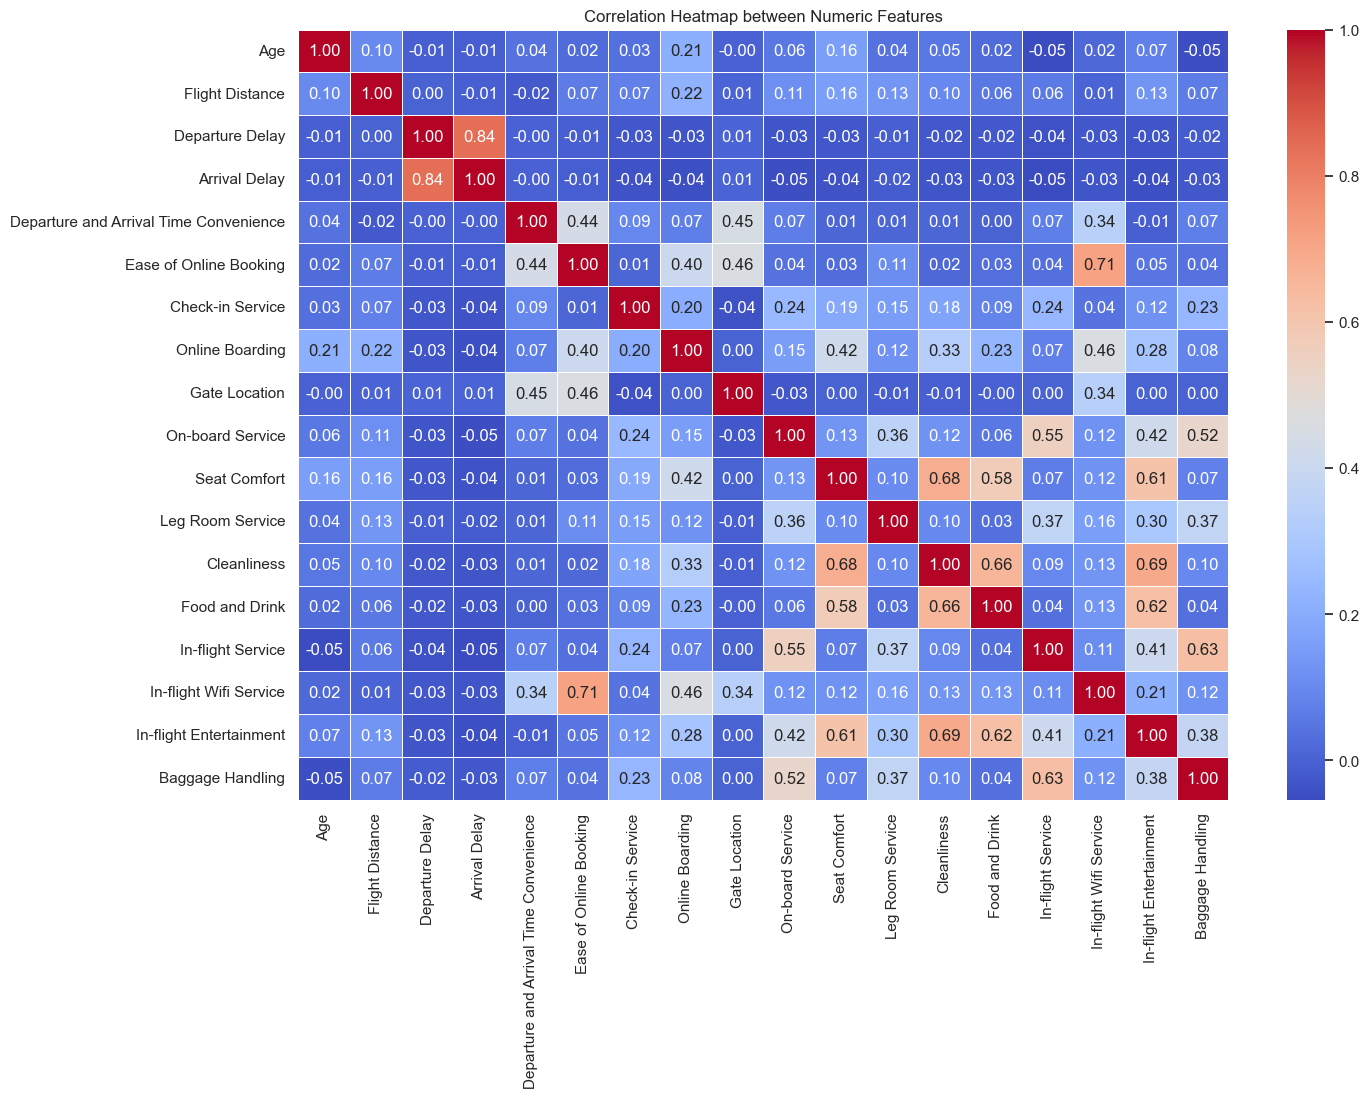

In [24]:
#Calculate the correlation matrix for numerical columns to identify multicollinearity
corr = df[numerical].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap between Numeric Features')
plt.show()



### Observation:
1. Arrival Delay and Departure Delay has high correlation, which indicates multicollinearity.
   we can drop any one of these column, to reduce noise and overfitting
2. Gate Location has no correlation with Satisfaction, hence drop it

# Step 5: Feature Engineering



### Droping the Arrival Delay and Gate location  


In [25]:
df.drop(['Arrival Delay','Gate Location'], axis=1, inplace=True)


### .Encoding Categorical Variables

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])
df['Type of Travel'] = le.fit_transform(df['Type of Travel'])
df['Customer Type'] = le.fit_transform(df['Customer Type'])
df['Class'] = le.fit_transform(df['Class'])
df['Satisfaction'] = le.fit_transform(df['Satisfaction'])



In [27]:
df.shape

(129880, 21)

### Splitting the data into train and test

In [28]:
# Separate features and target variable
x = df.drop("Satisfaction",axis = 1)
y = df["Satisfaction"]



In [29]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets 80:20
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2,random_state = 42,stratify = y)

In [30]:
x_train.shape , x_test.shape

((103904, 20), (25976, 20))

## Standardizing Features

In [31]:
# Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit the scaler on the training data and transform it
x_train = scaler.fit_transform(x_train) # Standardizes x_train by removing the mean and scaling to unit variance
# Transform the testing data using the same scaler
x_test = scaler.transform(x_test)# Applies the same transformation to x_test using parameters from x_train


# Step 6.Buliding machine Learning Model 


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [33]:
#Model Training and Evaluation Fuctions
#Function to train and evaluate models
def evaluate_model(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    y_pred_proba=model.predict_proba(x_test)[:,1]if hasattr(model,"predict_proba")else y_pred
    #evaluation metrics
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    auc=roc_auc_score(y_test,y_pred)
    return{"Accuracy":accuracy,"Precision":precision,"Recall":recall,"F1 Score":f1,"ROC AUC":auc}
result={}

In [34]:
#Model Training
#Logistic Regression 
log_reg = LogisticRegression(random_state=42)
result['Logistic Regression']=evaluate_model(log_reg)

In [35]:
#decision tree
tree=DecisionTreeClassifier(random_state=42)
result['Decision Tree']=evaluate_model(tree)

In [36]:
#Random Forest
rf=RandomForestClassifier(random_state=42)
result['Random Forest']=evaluate_model(rf)

In [39]:
#Naive Bayes
nb=GaussianNB()
result['Naive Bayes']=evaluate_model(nb)

In [41]:
#k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
result['KNN']=evaluate_model(knn)

In [42]:
# xgboost
xgb= XGBClassifier()
result['xgboost']=evaluate_model(xgb)


In [43]:
#Displaying results
#Convert results dictionary to DataFrame for easy viewing
result_df=pd.DataFrame(result).T
print("Model Evaluation Results:\n",result_df)

Model Evaluation Results:
                      Accuracy  Precision    Recall  F1 Score   ROC AUC
Logistic Regression  0.877733   0.871950  0.842282  0.856860  0.873626
Decision Tree        0.947298   0.936372  0.942761  0.939556  0.946772
Random Forest        0.964005   0.974686  0.941609  0.957862  0.961410
Naive Bayes          0.870034   0.869834  0.824207  0.846406  0.864724
KNN                  0.932746   0.952214  0.889864  0.919984  0.927777
xgboost              0.964660   0.973252  0.944622  0.958723  0.962338


### Feature Importance 
This visualization shows which features are most important for classificatoion

In [44]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

In [45]:
selection.feature_importances_

array([0.00443005, 0.01731834, 0.06874577, 0.13720468, 0.09779405,
       0.01423895, 0.00923519, 0.01527961, 0.0284931 , 0.02850725,
       0.15673673, 0.02685711, 0.04912867, 0.01936043, 0.02215084,
       0.00631097, 0.02473448, 0.1788328 , 0.06552961, 0.02911135])

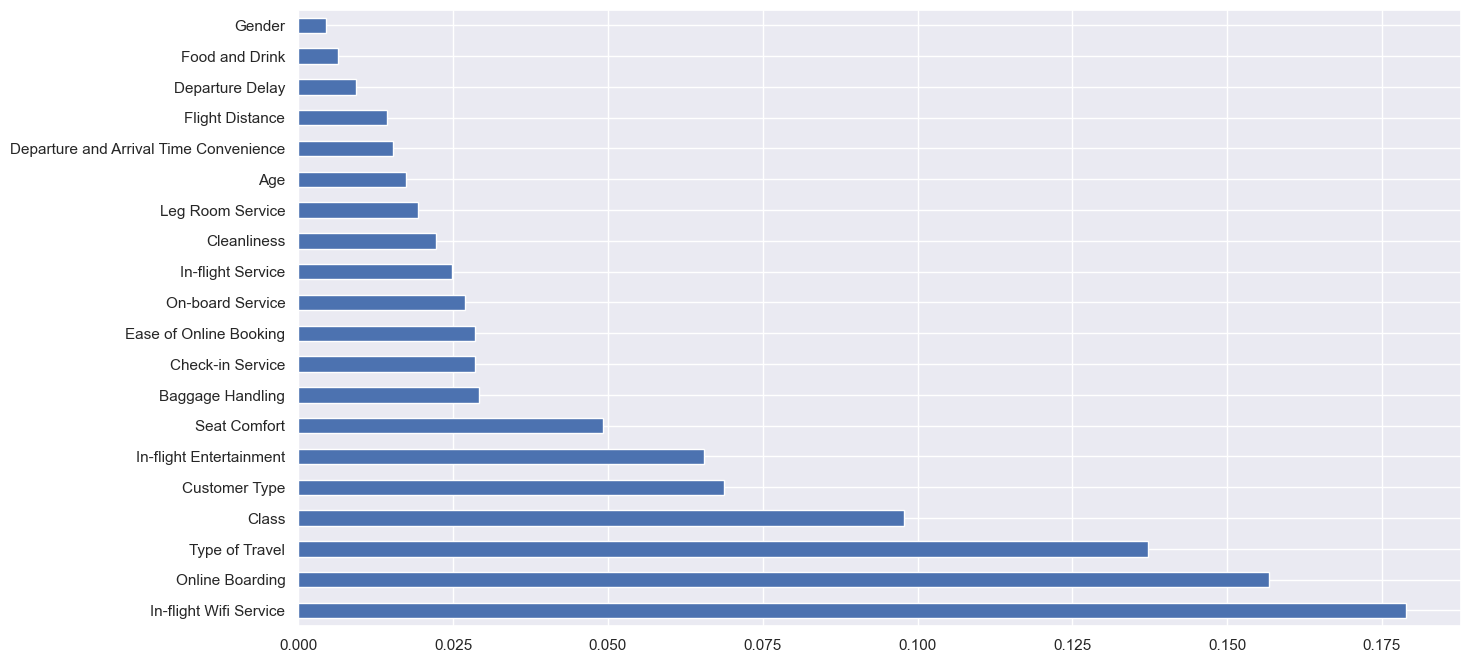

In [46]:
plt.figure(figsize=(15,8))
feature_imp = pd.Series(selection.feature_importances_, index=x.columns)
feature_imp.nlargest(20).plot(kind='barh')
plt.show()

In [47]:
#Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

In [48]:
#Dictionary to store best parameters for each model
best_params= {}

In [51]:
#Random Forest
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [7,11,15,21,27,31],
    'max_depth': [2,3,4,6,8,10,15],
    'criterion':['gini','entropy'],
    'max_features': ['auto', 'sqrt', 'log2']
}
grid_rf = RandomizedSearchCV(rf, param_grid_rf, cv=5, scoring='roc_auc', n_iter=10, random_state=42)
grid_rf.fit(x_train, y_train)
best_params['Random Forest'] = grid_rf.best_params_

In [55]:
# --- XGBoost ---
param_grid_xgb = {
    'n_estimators': [30,60,100],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid_xgb = RandomizedSearchCV(xgb, param_distributions=param_grid_xgb, n_iter=10, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1)
grid_xgb.fit(x_train, y_train)
best_params_xgb = grid_xgb.best_params_
print("Best parameters for XGBoost:", best_params_xgb)

Best parameters for XGBoost: {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 0.9}


In [56]:
#Display the best hyperparameter for each model
print("Best Parameters for each model:")
for model_name,params in best_params.items():
    print(f"{model_name}:{params}")

Best Parameters for each model:
Random Forest:{'n_estimators': 21, 'max_features': 'auto', 'max_depth': 15, 'criterion': 'gini'}


In [65]:
tuned_rf = RandomForestClassifier(n_estimators = 21, max_depth = 15, max_features='auto', criterion = 'gini')
tuned_rf.fit(x_train,y_train)
predt_rf = tuned_rf.predict(x_test)
accuracy = accuracy_score(y_test, predt_rf)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.9586926393594087


In [68]:
tuned_xg = XGBClassifier(n_estimators = 100, max_depth = 4, subsample = 0.9, learning_rate = 0.1, colsample_bytree= 0.9)
tuned_xg.fit(x_train,y_train)
predt_xg = tuned_xg.predict(x_test)
accuracy = accuracy_score(y_test, predt_xg)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.9509932245149368


### Random forest model appars to be the better performing model based on test accuracy after fine tuning

### Conclusion:
Overall Summary:
Customer satisfaction in this dataset is influenced by a complex interplay of factors spanning demographics, travel characteristics, flight-related aspects, and in-flight service and comfort.

    ------>>> Key Drivers of Satisfaction:
 * Positive Experiences for Returning and Business Travelers: These segments report higher satisfaction, suggesting their needs are generally being met.
 * Higher Travel Classes: Business and Economy Plus passengers are significantly more satisfied, highlighting the value of enhanced comfort and services.
 * Punctuality: Minimal departure and arrival delays are crucial for customer satisfaction.
 * Convenience and Efficiency: Easy online booking and smooth check-in processes contribute positively to satisfaction.
 * Comfort and Service: Comfortable seating, adequate legroom, cleanliness, good food and drink, high-quality in-flight service, and reliable Wi-Fi are all strong drivers of satisfaction
 
   ------>>> Key Drivers of Dissatisfaction:
 * Negative Experiences for First-Time and Personal Travelers: These groups show higher rates of dissatisfaction, indicating potential areas for improvement in their journey.
 * Lower Travel Classes (Economy): Passengers in economy class are the least satisfied, suggesting a need to address their comfort and service expectations.
 * Flight Delays: Both departure and arrival delays significantly impact customer dissatisfaction.
 * Inconvenience: Difficult online booking and inefficient check-in processes lead to dissatisfaction.
 * Lack of Comfort and Poor Service: Uncomfortable seating, insufficient legroom, lack of cleanliness, poor food and drink, inadequate in-flight service, and poor Wi-Fi are all major contributors to dissatisfaction.
 
    ------>>>Recommendations:
   To improve overall customer satisfaction, the airline should focus on:
 * Enhancing the experience for first-time and personal travelers. Understanding their specific pain points and tailoring services accordingly could be beneficial.
 * Considering improvements for economy class passengers within feasible operational constraints.
 * Minimizing flight delays as they have a significant negative impact.
 * Maintaining and improving the quality of online booking and check-in services.
 * Prioritizing comfort and service factors such as seat comfort, legroom, cleanliness, food and drink quality, in-flight service, and Wi-Fi, as these directly influence customer satisfaction across all segments.
 * Investigating the reasons for lower satisfaction among younger and older age groups to address their specific needs.
By focusing on these areas, the airline can work towards increasing customer satisfaction and fostering greater loyalty.